# Capstone Project - Interim Report

# 1) Industry Review
### a) Industry Review – Current practices, Background Research 
### b) Literature Survey - Publications, Application, past and undergoing research

# 2) Dataset and Domain

### a) Data Dictionary 

| Sno | Variable | Data type | Description | 
| --- |   ------------------------ | --------------------- |  -------------------------------------- |
| 1 | RowNumber  | Numeric |  Corresponds to the record (row) number and has no effect on the output.|
| 2 | CustomerId | Numeric |  contains random values and has no effect on customer leaving the bank.|
| 3 | Surname  | Categorical |  the surname of a customer has no impact on their decision to leave the bank.|
| 4 | CreditScore  | Numeric | can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.|
| 5 | Geography | Categorical | a customer’s location can affect their decision to leave the bank.|
| 6 | Gender | Categorical | it’s interesting to explore whether gender plays a role in a customer leaving the bank.|
| 7 | Age | Numeric  | this is certainly relevant, since older customers are less likely to leave their bank than younger ones.|
| 8 | Tenure  | Numeric  | refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.|
| 9 | Balance   | Numeric | also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.|
| 10 | NumOfProducts  | Numeric | refers to the number of products that a customer has purchased through the bank.|
| 11 | HasCrCard  | Numeric | denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.|
| 12 | IsActiveMember  | Numeric  | active customers are less likely to leave the bank.|
| 13 | EstimatedSalary | Numeric  | as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.|
| 14 | Exited  | Numeric | whether or not the customer left the bank. **Target variable**|
| 15 | Complain  | Numeric | customer has complaint or not.|
| 16 | Satisfaction Score | Numeric  | Score provided by the customer for their complaint resolution.|
| 17 | Card Type  | Categorical  | type of card hold by the customer.|
| 18 | Points Earned | Numeric | the points earned by the customer for using credit card.|

-	Alternate sources of data that can supplement the core dataset (at least 2-3 columns)
-	Project Justification -  Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value


### 1) Importing the required libraries

In [1]:
from datetime import datetime
from datetime import timedelta
import time
start_time = time.time()

In [2]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import   pandas                 as      pd
import   numpy                  as      np
import   matplotlib.pyplot      as      plt
import   seaborn                as      sns
import   scipy.stats            as      stats
from     scipy                  import  stats
import   statsmodels.api        as     sm
from     sklearn.preprocessing                 import   LabelEncoder
from     statsmodels.stats.outliers_influence  import   variance_inflation_factor
import   warnings

from    sklearn.preprocessing    import   StandardScaler
from    sklearn.preprocessing    import   MinMaxScaler
from    sklearn.tree             import   DecisionTreeClassifier
from    sklearn.metrics          import   accuracy_score, explained_variance_score

from    sklearn.experimental     import enable_iterative_imputer
from    sklearn.impute           import IterativeImputer
from    sklearn.linear_model      import LinearRegression

In [5]:
from   sklearn.feature_selection   import  RFECV
from   sklearn.feature_selection   import  RFE
from   sklearn                     import  metrics
from   sklearn.pipeline            import  Pipeline
from   sklearn                     import  preprocessing   
from   sklearn.model_selection     import  cross_val_score
from   sklearn.model_selection     import  RepeatedStratifiedKFold
from   sklearn.ensemble            import  RandomForestClassifier
from   sklearn.model_selection     import  train_test_split

In [6]:
import  os

folder =  r'H:\DSE-Capstone\20241011'

os.chdir(folder)

In [7]:
os.getcwd()

'H:\\DSE-Capstone\\20241011'

#### Function to calculate count and percentage of missing values

In [8]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [9]:
def identify_outliers(df, var):
    # Interquartile Range (IQR)

    # Calculate the upper and lower limits
    Q1                     =    df[var].quantile(0.25)
    Q3                     =    df[var].quantile(0.75)
    IQR                    =    Q3 - Q1  
    low                    =    Q1 - (1.5 * IQR)
    
    lower                  =    abs(Q1 - 1.5 * IQR)
    upper                  =    abs(Q3 + (1.5 * IQR))
    outlier_upper          =    df[df[var] > upper].count()[1]
    outlier_lower          =    df[df[var] < low].count()[1]
    
    m                      =    np.min(df[var])
    mX                     =    np.max(df[var])
    Zero_l                 =    df.loc[df[var]==0,var].sum()
    
    print("\nFeature :{} Lower_quartile: {} ,Upper_quartile: {} ".format(var,lower, upper))
    print("\nMax value: {} Minimum value: {}".format(mX, m))
    print("\nGreater than UpperIQR : {}, Less than lower_IQR : {} ,  zero_count:  {}".format(outlier_upper,outlier_lower,Zero_l))
    
    outliers_present       =   outlier_upper > 0 or outlier_lower > 0
    if outliers_present:
       print("\nVariable {} has outliers".format(var))
    else:
       print("\nVariable {} has NO outliers".format(var))        
    df.boxplot(column = [var])
    plt.show()

In [10]:
def chk_ttest(var):
    g1           =    df.loc[df['Exited'] == 0, var]
    g2           =    df.loc[df['Exited'] == 1, var]    
    stat, pval   =    stats.ttest_ind(g1, g2, equal_var = False)
    txt          =    "\nThere is No statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    if pval < 0.05:
       txt       =    "\nThere is a statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    
    print(txt)

In [11]:
def chk_chisq(i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df['Exited'])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
    
    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)    
 
    print("\n{}".format(txt))   

In [12]:
def  hist_numerical(var, df):
    mean_mu   =   df[var].mean()
    ttile     =  "Histogram for the variable: {}".format(var)
    mu_txt    =  r'$\mu = $' + str(round(mean_mu,1)) 
    # Histogram
    sns.histplot(x= df[var], kde = True)
    plt.title(ttile)
    plt.xticks(rotation = 90)
    plt.show()

In [13]:
def  draw_countplot(df, i, var):
     print("\n{0}: Variable, {1}".format(i, var))
     x         =  df[var]
     y         =  df['Exited']
     ttile     =  "Bar Chart for the variable: {}".format(var) 
     plt.title(ttile)    
     sns.countplot(x = x, hue = y, data = df)
     plt.show()

In [14]:
def draw_boxplot1(df, i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    titlex  =  '\n\nBoxplot for ' + var + '\n'
    sns.catplot(data = df, x = 'Geography', y = var, col = 'Gender', hue = 'Exited', kind = 'box')
    plt.xlabel(var)
    plt.ylabel('Geography')
    plt.show()

In [15]:
def draw_boxplot2(df, i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    titlex  =  '\n\nBoxplot for ' + var + '\n'
    sns.catplot(data = df, x = 'Card Type', y = var, col = 'Gender', hue = 'Exited', kind = 'box')
    plt.xlabel(var)
    plt.ylabel('Card Type')
    plt.show()

In [16]:
def pointbiserialr(df, col1, y):
    x   =  df[col1]
    stat, p    =  stats.pointbiserialr(y, x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
     print('{} There is no correlation'.format(col1))
    else:
     print('{} There is a correlation'.format(col1))

In [17]:
def  label_enc(df, col):
     le        =  LabelEncoder()
     colx      =  col + '_code'
     df[colx]  = le.fit_transform(df[col])  

In [18]:
### compare_models
### ------------------------------------------------------------------------------------------

"""
9) Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(n_splits, random_state, X_train, Y_train):  

    ### To compare algorithms
    
    from    matplotlib                  import   pyplot
    from    sklearn.model_selection     import   KFold
    from    sklearn.model_selection     import   StratifiedKFold
    from    sklearn.model_selection     import   cross_val_score
    from    sklearn.linear_model        import   LogisticRegression
    from    sklearn.tree                import   DecisionTreeClassifier
    from    sklearn.neighbors           import   KNeighborsClassifier
    from    sklearn.naive_bayes         import   GaussianNB
    from    sklearn.ensemble            import   RandomForestClassifier
    
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    

    scores_req =  ['roc_auc', 'precision', 'recall']
   
    print("\n n_splits %d random_state %d" % (n_splits, random_state)) 
    
    for i in range(len(scores_req)):
        results    =   []
        names      =   []        
        scoring    =  scores_req[i]
        
        print(scoring)
        
        for name, model in models:

            ## kfold           =   KFold(n_splits = n_splits, random_state = 12345) 
            skf             =   StratifiedKFold(n_splits=n_splits, random_state = random_state, shuffle = True)
            cv_results      =   cross_val_score(model, X_train, Y_train, cv = skf, scoring = scoring)
            results.append(cv_results)	
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = pyplot.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        pyplot.boxplot(results)
        ax.set_xticklabels(names, rotation=90, ha='right')
        pyplot.show()

### ------------------------------------------------------------------------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [20]:
def get_significant_vars( lm, sig_level ):
    
    import pandas as pd
    
    var_p_vals_df         = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )


In [21]:
def check_linearity(x1, df, title, y1):
    
    import matplotlib.pyplot as plt
    import seaborn           as sns
    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

In [22]:
def logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ):  

    import statsmodels.api          as      sm
    
    from   sklearn.linear_model     import  LogisticRegression 
    from   sklearn.metrics          import  classification_report
    from   sklearn.metrics          import  confusion_matrix
    from   sklearn.model_selection  import  cross_val_score
    
    from   sklearn.model_selection  import  KFold 
    
    model = LogisticRegression() 

    model.fit(X_train, Y_train) 
    predicted_train    = model.predict(X_train) 
    matrix             = confusion_matrix(Y_train, predicted_train)
    print("\nTraining Data")
    print(matrix)
    draw_cm(Y_train, predicted_train )
    
    accuracy_train = model.score(X_train, Y_train) 
    print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

    print("\nTesting Data")

    predicted_testing  = model.predict(X_test) 
    matrix             = confusion_matrix(Y_test, predicted_testing)
    print(matrix)
    draw_cm(Y_test, predicted_testing)
    
    accuracy_test      = model.score(X_test, Y_test) 
    print("Test Accuracy: %.3f%%" % (accuracy_test * 100.0))
    

    measures_train     = classification_report(Y_train, predicted_train) 
    print("\nTraining data")
    print(measures_train) 

    measures_test      = classification_report(Y_test, predicted_testing) 
    print("\nTesting data")
    print(measures_test) 
    
    kfold              = KFold(n_splits = n_splits, shuffle = True, random_state = random_state)
    scoring            = 'roc_auc' 

    auc_train          = cross_val_score(model, X_train, Y_train,  scoring=scoring) 
    print("\nTraining data")
    draw_roc( Y_train, predicted_train)    


    auc_test           = cross_val_score(model, X_test, Y_test,  scoring=scoring) 
    print("\nTesting data")    
    draw_roc( Y_test, predicted_testing)
    
    print("\nWith K fold cross validation")
    
    scoring           = 'accuracy'
    print("\nScoring:  %s" %scoring)
    cv_accuracy_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_accuracy_train)
    print("\nAccuracy: %.3f (%.3f)" % (cv_accuracy_train.mean(), cv_accuracy_train.std()))
    
    scoring           = 'precision'
    print("\nScoring:  %s" %scoring)    
    cv_precision_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_precision_train)
    print("\nPrecision: %.3f (%.3f)" % (cv_precision_train.mean(), cv_precision_train.std()))
  
    scoring           = 'recall'
    print("\nScoring:  %s" %scoring)
    
    cv_recall_train   = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_recall_train)
    print("\nRecall: %.3f (%.3f)" % (cv_recall_train.mean(), cv_recall_train.std()))
    
    scoring           = 'roc_auc'
    print("\nScoring:  %s" %scoring)    
    cv_roc_auc_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_roc_auc_train)
    print("\nAUROC: %.3f (%.3f)" % (cv_roc_auc_train.mean(), cv_roc_auc_train.std()))
    

In [23]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [24]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### 2) Read data

In [25]:
df = pd.read_csv('./Data/Customer-Churn-Records.csv')

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### 3) Understanding Dataset and Domain

### Variable categorization (count of numeric and categorical)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [28]:
df.select_dtypes(include = 'object').head()

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD


In [29]:
df.select_dtypes(include = 'number').head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


Inferences:
    
    -->Number of Catagorical Columns : 4
    
    -->Number of Numerical Columns : 14 of which one is our target variable

### b) Variable categorization (count of numeric and categorical)

In [30]:
df.select_dtypes(include = 'object').columns

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')

In [31]:
df.select_dtypes(include = 'number').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

## I ---> Numerical variables

### There are 14 numerical variables and listed below:

### 1 ) RowNumber
### 2 ) CustomerId
### 3 ) CreditScore
### 4 ) Age
### 5 ) Tenure
### 6 ) Balance
### 7 ) NumOfProducts
### 8 ) HasCrCard'
### 9 ) IsActiveMember
### 10 ) EstimatedSalary
### 11 ) Exited
### 12 ) Complain
### 13) Satisfaction Score
### 14 ) Point Earned

## II ---> Categorical variables

### There are 4 numerical variables and listed below:

### 1 ) Surname
### 2 ) Geography
### 3 ) Gender
### 4 ) Card Type

#### Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

<b>Null or Missing Values</b>

In [32]:
NA_df =  missing_zero_values_table(df)

Your selected dataframe has 18 columns and 10000 Rows.
There are 0 columns that have missing values.


### c) Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

### I) count of missing/ null values

### Observations

**There are 10,000 rows and 18 columns.**
**There are NO missing values (NAs).

### II) Redundant Columns

In [33]:
k = df.columns
for i in k:
    print('Column Name:',i)
    print('Number of Unique Variables in',i,'is: ',df[i].nunique())

Column Name: RowNumber
Number of Unique Variables in RowNumber is:  10000
Column Name: CustomerId
Number of Unique Variables in CustomerId is:  10000
Column Name: Surname
Number of Unique Variables in Surname is:  2932
Column Name: CreditScore
Number of Unique Variables in CreditScore is:  460
Column Name: Geography
Number of Unique Variables in Geography is:  3
Column Name: Gender
Number of Unique Variables in Gender is:  2
Column Name: Age
Number of Unique Variables in Age is:  70
Column Name: Tenure
Number of Unique Variables in Tenure is:  11
Column Name: Balance
Number of Unique Variables in Balance is:  6382
Column Name: NumOfProducts
Number of Unique Variables in NumOfProducts is:  4
Column Name: HasCrCard
Number of Unique Variables in HasCrCard is:  2
Column Name: IsActiveMember
Number of Unique Variables in IsActiveMember is:  2
Column Name: EstimatedSalary
Number of Unique Variables in EstimatedSalary is:  9999
Column Name: Exited
Number of Unique Variables in Exited is:  2
C

As obvious, RowNumber and CustomerId are unique variables to every entry and do not assist our model in any way since they have 10,000 unique values. 
Similarly, Surname has 2932 unique values and it does not assist our model in any way.

### Redundant columns are RowNumber, CustomerId and Surname

### We must therefore drop them as they are redundant variables.


In [34]:
drop_cols = ['RowNumber','CustomerId','Surname']

In [35]:
df.drop(columns = drop_cols, axis = 1, inplace = True)

In [36]:
cat_cols = df.select_dtypes(include = 'object').columns

In [37]:
cat_cols

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [38]:
df_numeric           =   df.select_dtypes(include = 'number')

In [39]:
df_numeric.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')

In [40]:
df_numeric_    =  pd.DataFrame(df_numeric)
type(df_numeric_)

pandas.core.frame.DataFrame

In [41]:
df_categorical   =   df.select_dtypes(include = 'object')
df_categorical.columns

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [42]:
type(df_categorical)

pandas.core.frame.DataFrame

#### Observations

We have now dropped our redundant column and our data is ready for further processing.

### d) Alternate sources of data that can supplement the core dataset (at least 2-3 columns)
1) Price Perception
2) Trust

### e) Project Justification -  Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

#### Project Statement

To develop a robust customer churn prediction model for the European MNC bank operating in France, Germany, and Spain. 

#### Complexity involved - Low

#### Project Outcome –Commercial, Academic or Social value - Commercial

# 3) Data Exploration (EDA)

### Converting and Labelling the Data

Since the majority of machine learning algorithms are created to operate with numerical data, categorical data is converted to numerical data using label encoding techniques. 

**Label Encoding** is a common technique for converting categorical variables into numerical values. Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.

In [43]:
df.select_dtypes(include = 'object').columns

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [44]:
new_df            =   df.copy()
new_df['Exited']  =   df['Exited']

Variables ('Geography', 'Gender', 'Card Type') need to be encoded for further analysis and preprocessing.

In [45]:
cat_newdf         =  new_df.select_dtypes(exclude=['int64','float64'])
cat_cols          =  cat_newdf.columns
for col in cat_cols:
    label_enc(new_df, col)

In [46]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Geography_code', 'Gender_code', 'Card Type_code'],
      dtype='object')

In [47]:
new_df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.1


### 3.1) Relationship between variables

### Numerical variable vs Target variable

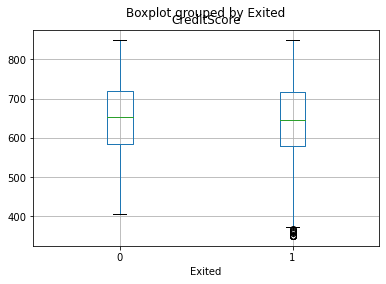

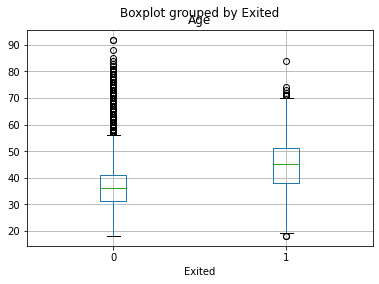

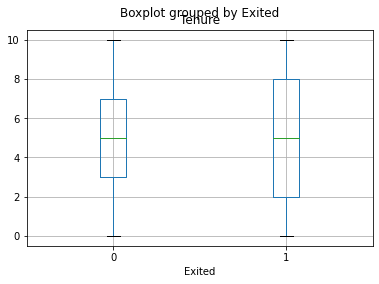

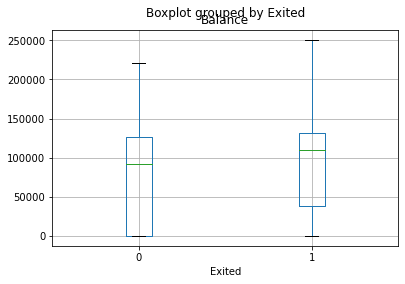

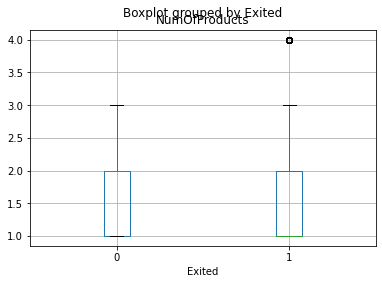

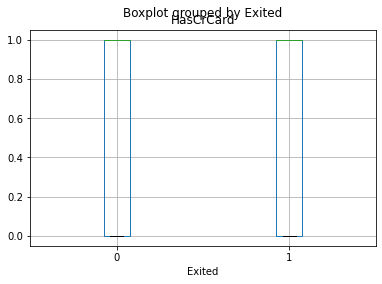

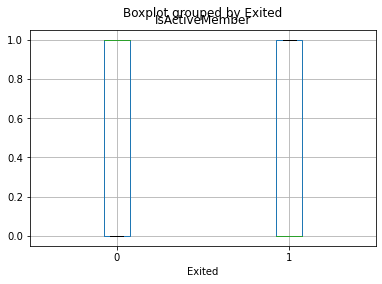

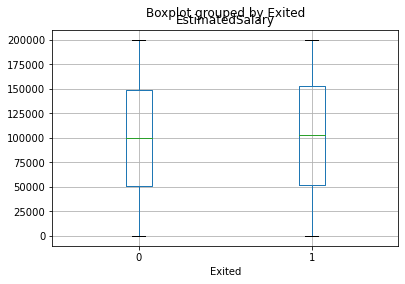

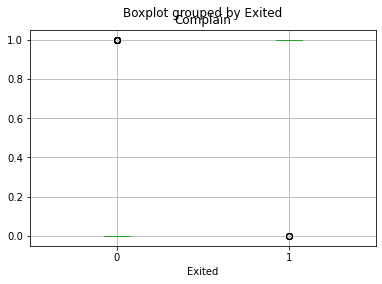

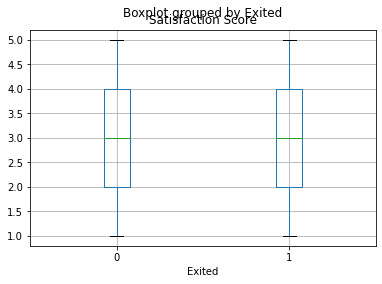

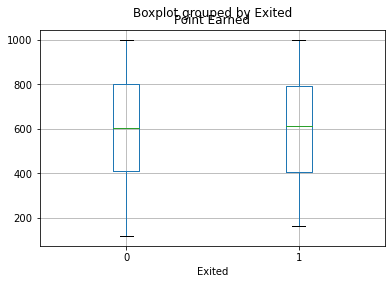

In [48]:
# Define the numerical and categorical columns for analysis
numerical_columns    = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember',\
                       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
categorical_columns = ['Exited']

for  var in numerical_columns :
     new_df.boxplot(var, by = 'Exited')
     plt.show()


### 3.2) Check for 
### 3.2.1) multi-collinearity

In [49]:
X = new_df[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Complain', 'Satisfaction Score', 'Point Earned', 'Geography_code', 'Gender_code', 'Card Type_code']]
Y = new_df['Exited']

In [50]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,CreditScore,24.854237
1,Age,14.082619
2,Tenure,3.894807
3,Balance,2.699604
4,NumOfProducts,7.868252
5,HasCrCard,3.304297
6,IsActiveMember,2.152617
7,EstimatedSalary,3.908826
8,Complain,1.452181
9,Satisfaction Score,5.291097


As visible, the following five (5) variables are having high **VIF** value greater than 5.

### Interpretation of VIF value

The higher the value, the greater the correlation of the variable with other variables. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

1) CreditScore, 2) Age, 3) NumOfProducts, 4) Satisfaction Score and 5) Point Earned.	

We need to remove variables having greater than the threshold value of 5 from our dataset.

### 3.2.2) Distribution of variables

## a) Histogram for continuous numerical variable

### A histogram helps to understand the distribution of values in single continuous column

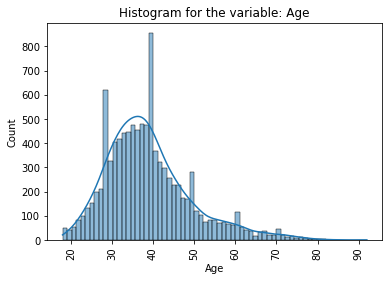

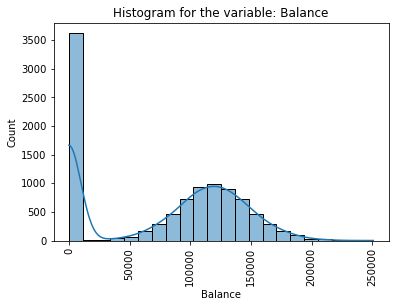

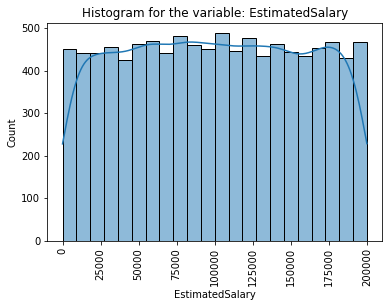

In [51]:
num_vars             =    ['Age',  'Balance',  'EstimatedSalary']
for  var in num_vars:
     hist_numerical(var, df)    

### Observations

**None of the continuous numerical variables ('Age',  'Balance',  'EstimatedSalary') are normally distributed.**

## b) Bar charts for categorical variables

### A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars.


1: Variable, Geography


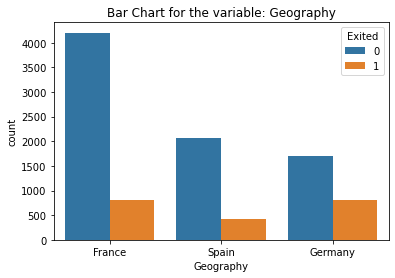


2: Variable, Gender


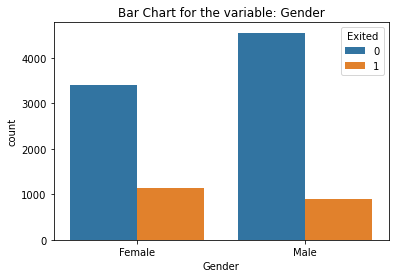


3: Variable, Card Type


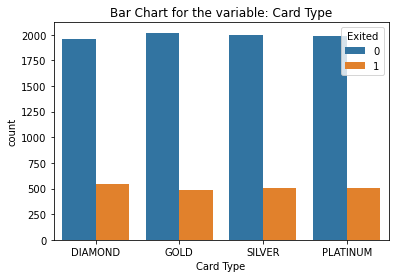

In [52]:
# Define the categorical columns for analysis
categorical_columns    =   ['Geography', 'Gender', 'Card Type']
i                      =   1
for var in categorical_columns :
    draw_countplot(new_df, i, var)
    i += 1

### Box charts for numerical variables grouped by categorical variables

In [53]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Geography_code', 'Gender_code', 'Card Type_code'],
      dtype='object')


1: Variable, CreditScore


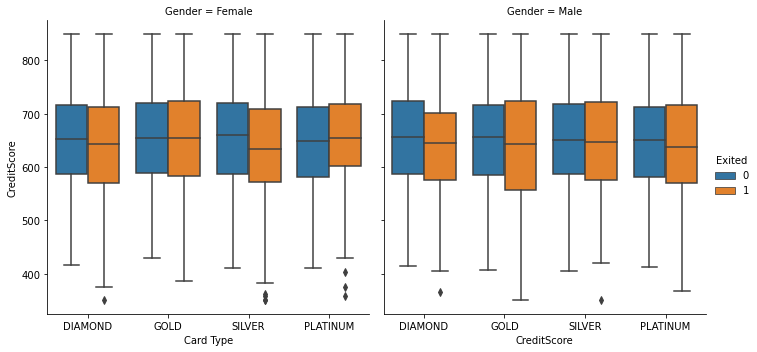


2: Variable, Age


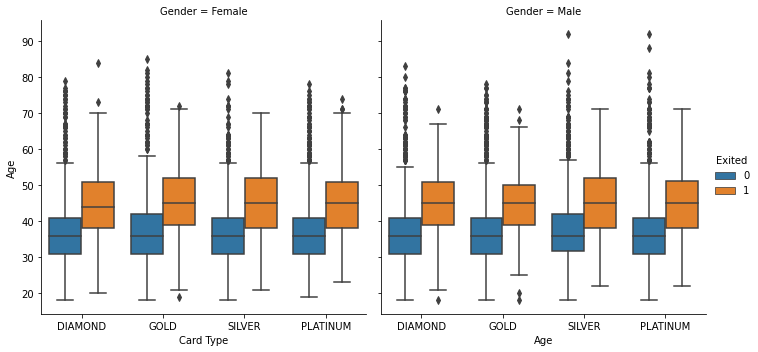


3: Variable, Tenure


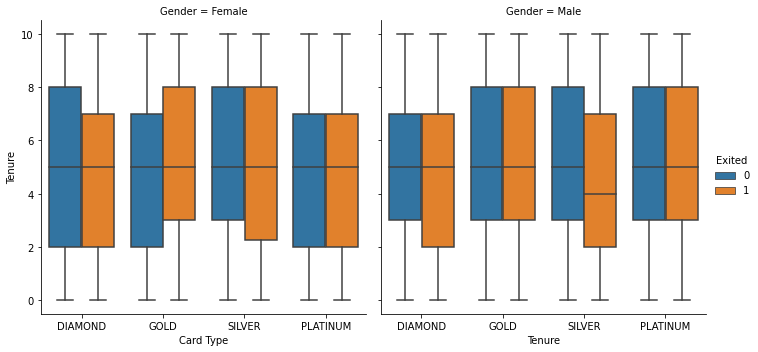


4: Variable, Balance


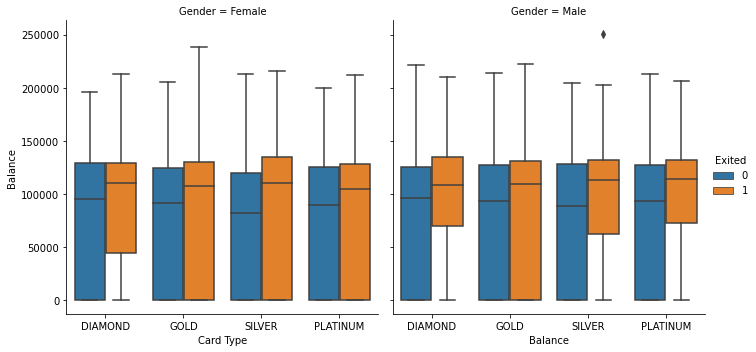


5: Variable, EstimatedSalary


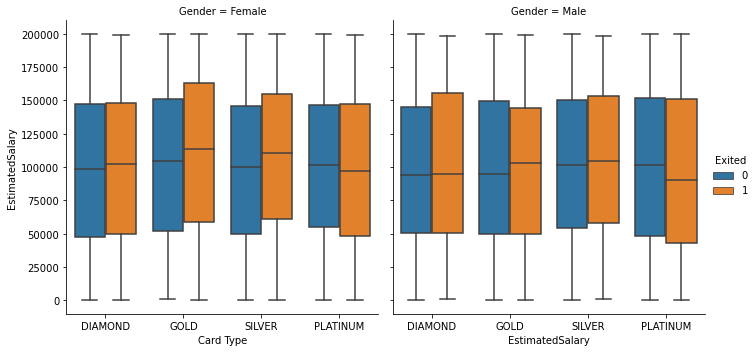


6: Variable, Point Earned


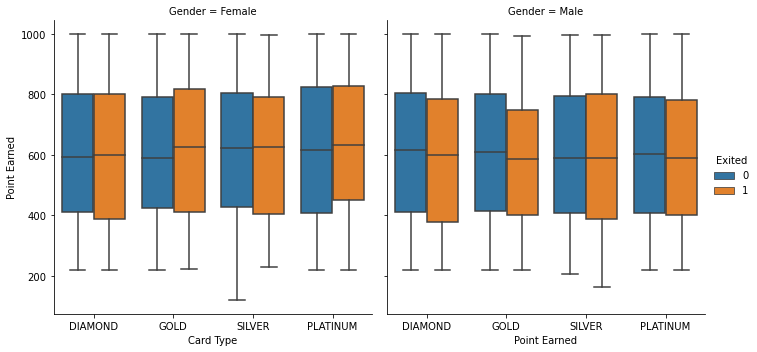

In [54]:
numerical_columns    = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
i  =  1
###
for var in numerical_columns :
    draw_boxplot2(new_df, i, var)
    i += 1


1: Variable, CreditScore


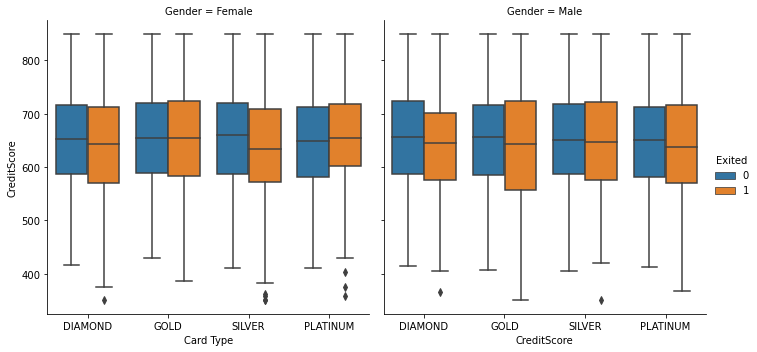


2: Variable, Age


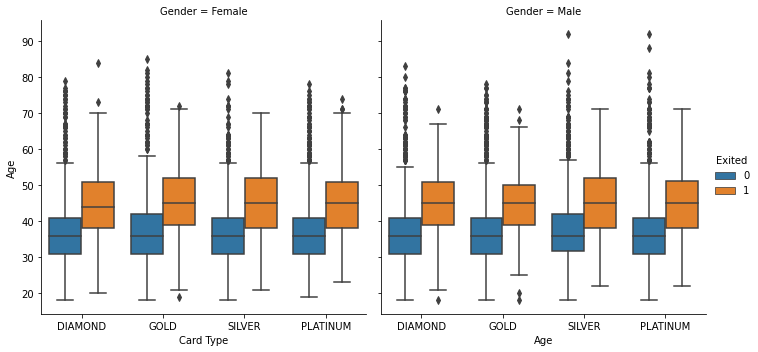


3: Variable, Tenure


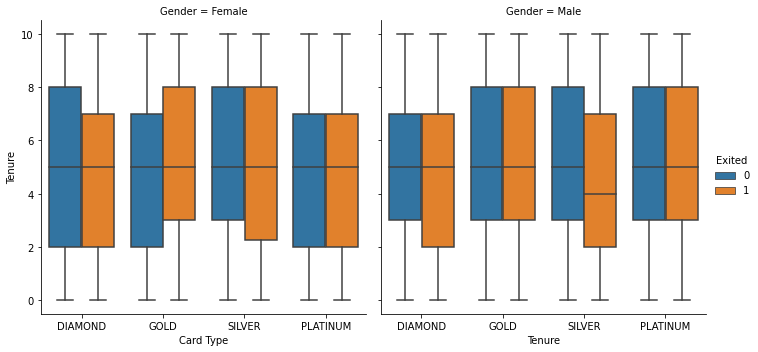


4: Variable, Balance


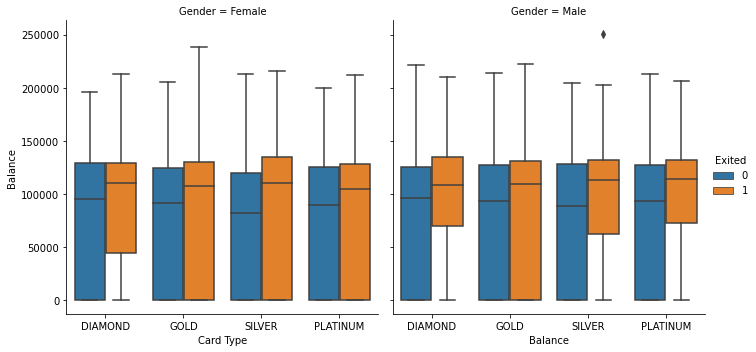


5: Variable, EstimatedSalary


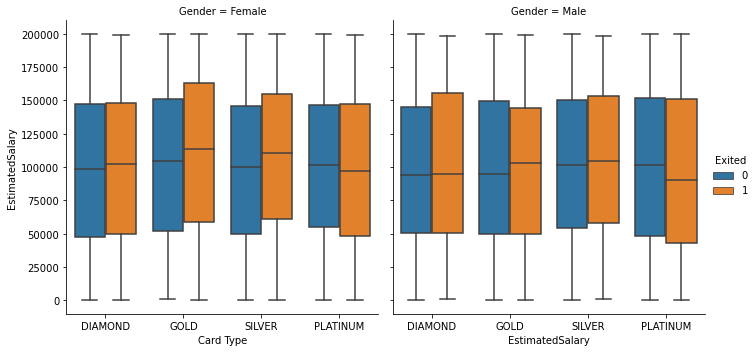


6: Variable, Point Earned


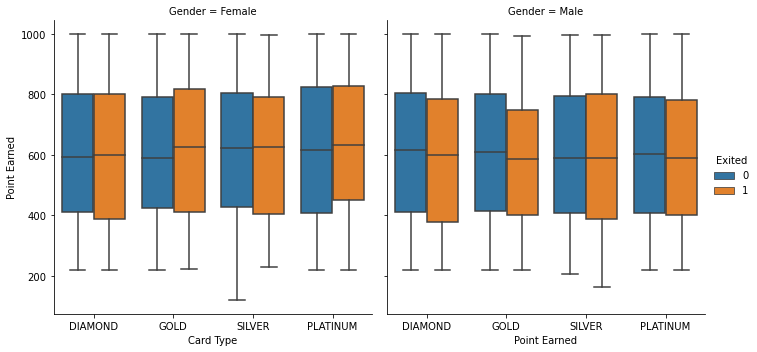

In [55]:
### 
i  =  1
for var in numerical_columns :
    draw_boxplot2(new_df, i, var)
    i += 1
###

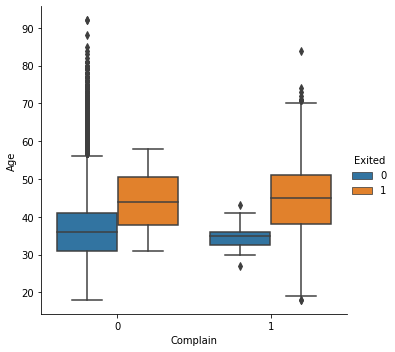

In [56]:
titlex  =  '\n\nBoxplot for age \n'
sns.catplot(data = df, x = 'Complain', y = 'Age', hue = 'Exited', kind = 'box')
plt.xlabel('Complain')
plt.ylabel('Age')
plt.show()

### 3.2.3) Presence of outliers and its treatment 

Outliers badly affect mean and standard deviation of the dataset. · It increases the error variance and reduces the power of statistical tests. By applying outlier treatment, machine learning practitioners can handle extreme values effectively. The primary goals of outlier treatment are: Identifying Outliers: Through various statistical methods, such as visualizations and mathematical approaches, outliers can be detected within a dataset.

We are interested to identify the outliers in our continuos numerical variables such as 'Age',  'Balance',  'EstimatedSalary' that affects the mean & standard deviation rather than the discrete numerical variables. Discrete variables are typically categorical, meaning they take on a limited number of values or categories. 

### However, if the outlier is physically possible you should consider it.


Feature :Age Lower_quartile: 14.0 ,Upper_quartile: 62.0 

Max value: 92 Minimum value: 18

Greater than UpperIQR : 359, Less than lower_IQR : 0 ,  zero_count:  0

Variable Age has outliers


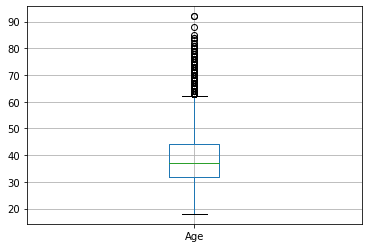


Feature :Balance Lower_quartile: 191466.36000000002 ,Upper_quartile: 319110.60000000003 

Max value: 250898.09 Minimum value: 0.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable Balance has NO outliers


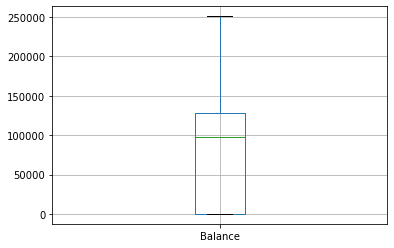


Feature :EstimatedSalary Lower_quartile: 96577.09624999999 ,Upper_quartile: 296967.45375 

Max value: 199992.48 Minimum value: 11.58

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable EstimatedSalary has NO outliers


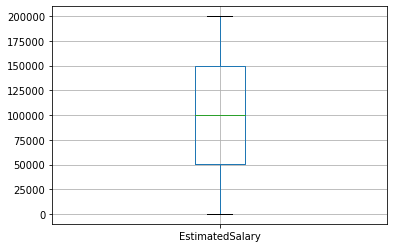

In [57]:
for  var in num_vars:
     identify_outliers(df, var)

### Ob servations

We have checked the presence of outliers in the continuous numerical variables ('Age', 'Balance', 'EstimatedSalary').
Only the variable, Age is having the outlier. We observe that the maximum value is 92 and it is a valid & phisically possible value. **Hence, we will retain the outliers for the variable, Age**. 

### 3.2.4) Statistical significance of variables

a) Numerical variables

An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated group of numerical variables to determine if there is a significant difference between the two.

Hypotheses are assumptions about reality whose validity is possible but not yet proven. Two hypotheses are always formulated that assert exactly the opposite. These two hypotheses are the null hypothesis and the alternative hypothesis.

Null hypothesis $H_0$	Alternative hypothesis $H_1$

There is no mean difference between the two groups in the population.

 Two population means are equal.
 The two groups are from the same population.
 $H_0$: μ1 = μ2

 Example: There is no difference between each variable of those who churned and who not churned.

There is a mean difference between the two groups in the population.

 The two population means are not equal.
 The two groups are not from the same population.
  $H_1$: μ1≠ μ2

There is mean difference between the two groups in the population.

In [58]:
# Define the numerical and categorical columns for analysis
numerical_columns    = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember',\
                       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
for var in numerical_columns :
    chk_ttest(var)


There is a statistically significant difference between the mean values of two groups of the Variable, CreditScore 

There is a statistically significant difference between the mean values of two groups of the Variable, Age 

There is No statistically significant difference between the mean values of two groups of the Variable, Tenure 

There is a statistically significant difference between the mean values of two groups of the Variable, Balance 

There is a statistically significant difference between the mean values of two groups of the Variable, NumOfProducts 

There is No statistically significant difference between the mean values of two groups of the Variable, HasCrCard 

There is a statistically significant difference between the mean values of two groups of the Variable, IsActiveMember 

There is No statistically significant difference between the mean values of two groups of the Variable, EstimatedSalary 

There is a statistically significant difference between the mean value

### Observations

Based on the unpaired t test, we find that
* there is **a statistically significant difference** between the mean values of two groups of the Variable, listed below:
1) CreditScore 
2) Age
3) Balance 
4) NumOfProducts 
5) IsActiveMember 
6) Complain 

* there is **no statistically significant difference** between the mean values of two groups of the Variable, listed below:
1) Tenure
2) HasCrCard
3) EstimatedSalary
4) Satisfaction Score
5) Point Earned

### Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. 

Null hypothesis: $H_0$: Samples are drawn from normal distribution.
Alternative hypothesis: $H_1$: Samples are NOT drawn from normal distribution.        

In [59]:
num_vars             =    ['Age',  'Balance',  'EstimatedSalary']
i                    =    1
for  var in num_vars:
     x          =   df[var]
     stat, pval =   stats.shapiro(x)
     print("\n\n{0}: P value of Shapiro test for {1} is {2}".format(i, var, pval))
     i         +=  1
     if pval < 0.05:
        print("\nSamples of {} are NOT from a normal distribution".format(var))    
     else:
        print("\nSamples of {} are from a normal distribution".format(var))        




1: P value of Shapiro test for Age is 0.0

Samples of Age are NOT from a normal distribution


2: P value of Shapiro test for Balance is 0.0

Samples of Balance are NOT from a normal distribution


3: P value of Shapiro test for EstimatedSalary is 0.0

Samples of EstimatedSalary are NOT from a normal distribution


### Observations

Based on the Shapiro test for normality, we observe the following:
'Age',  'Balance',  'EstimatedSalary' are **not normally** dustributed.

b) Categorical variables

The $\chi^2$ - (Chi Sqaure) test of independence analysis utilizes a cross tabulation table between the variables of interest r rows and c columns. 

Based on the cell counts, it is possible to test if there is a relationship, dependence, between the variables and to estimate the strength of the relationship. 

#### Assumptions

* The two samples are independent
* No expected cell count is = 0
* No more than 20% of the cells have and expected cell count < 5

### Hypothesis

Null hypothesis $H_0$: Variables are independent	

Alternative hypothesis $H_1$: Variables are NOT independent	

In [60]:
# Define the categorical columns for analysis
categorical_columns    =   ['Geography', 'Gender', 'Card Type']
i  =  1
for var in categorical_columns :
    chk_chisq(i, var)
    i += 1


1: Variable, Geography

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
(300.6264011211942, 5.245736109572763e-66, 2, array([[3992.1468, 1021.8532],
       [1997.6658,  511.3342],
       [1972.1874,  504.8126]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Geography and Target variable are dependent

2: Variable, Gender

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
(112.39655374778587, 2.9253677618642e-26, 1, array([[3617.1366,  925.8634],
       [4344.8634, 1112.1366]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Gender and Target variable are dependent

3: Variable, Card Type

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by look

### Observations

We have checked each categorical independent variable with our target categorical variable using Chi Square test of independence. We observed the assumption for chi-square test of independence *(No more than 20% of the cells have and expected cell count < 5)* is satisfied.

**Each of the independent variables, 'Geography', 'Gender' and the target variable, Exited are dependent.**

**Independent variable, 'Card Type' and the target variable, Exited are independent.**

###  Calculate Correlation Between Continuous & Binary Target Variable

Point biserial correlation is used to calculate the correlation between a binary categorical variable (a variable that can only take on two values) and a continuous variable and has the following properties:

Point biserial correlation can range between -1 and 1.
For each group created by the binary variable, it is assumed that the continuous variable is normally distributed with equal variances.
For each group created by the binary variable, it is assumed that there are no extreme outliers.

The hypotheses for point biserial correlation thus result in:

Null hypothesis: The correlation coefficient r = 0 (There is no correlation)

Alternative hypothesis: The correlation coefficient r ≠ 0 (There is a correlation)

In [61]:
Target            =  df['Exited']
colsn             =  ['Age',  'Balance',  'EstimatedSalary']
for  col1 in colsn:
    x   =   df[col1]
    y   =   df['Exited']
    pointbiserialr(df, col1, y)

stat=0.285, p=0.000
Age There is a correlation
stat=0.119, p=0.000
Balance There is a correlation
stat=0.012, p=0.212
EstimatedSalary There is no correlation


### 3.2.5) class imbalance and its treatment

<AxesSubplot:>

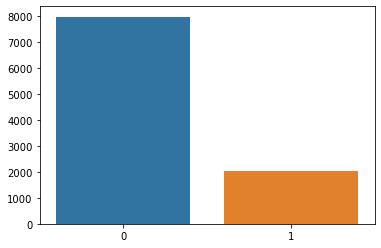

In [62]:
b = Y.value_counts()
sns.barplot(x = b.index,y = b.values)

### Observations

As visible, our data is highly imbalanced. Imbalanced datasets can lead to a bias towards the majority class, as the model is trained on a majority of samples from the majority class. This can result in poor performance in the minority class.
Hence, we need to treat data imbalance.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

**Another method is under-sampling.**

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

We prefer Over-sampling by SMOTE method.

# 4) Feature Engineering

## 4.1) Whether any transformations required

Data transformation is used when data needs to be converted to match that of the destination system.

**We have performed label encoding to make our data suitable for model building.**

## 4.2) Scaling the data

In Data Processing, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

The concept of standardization comes into picture when continuous independent variables are measured at different scales. https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

Data scaling is applied to numeric columns. In our dataset we have three continuous numerical columns:.

1) Age
2) Balance
3) EstimatedSalary

The script below filters these three columns and removes the remaining columns.

In [63]:
data_numeric = new_df.filter(['Age',  'Balance',  'EstimatedSalary'], axis = 1)

data_numeric.head()

,Age,Balance,EstimatedSalary
0,42,0.00,101348.88
1,41,83807.86,112542.58
2,42,159660.80,113931.57
3,39,0.00,93826.63
4,43,125510.82,79084.10


Let’s plot some statistical values for the columns in our dataset using the describe() method.

In [64]:
data_numeric.describe()

,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000
mean,38.921800,76485.889288,100090.239881
std,10.487806,62397.405202,57510.492818
min,18.000000,0.000000,11.580000
25%,32.000000,0.000000,51002.110000
50%,37.000000,97198.540000,100193.915000
75%,44.000000,127644.240000,149388.247500
max,92.000000,250898.090000,199992.480000


### Robust scaling 

Both standard and robust scalers transform inputs to comparable scales. The difference lies in how they scale raw input values.

Standard scaling uses mean and standard deviation. Robust scaling uses median and interquartile range (IQR) instead.

Robust scaling answers a simple question. How far is each data point from the input’s median? 

### The fact that robust scaling uses median and IQR makes it resistant to outliers. 

In [65]:
from sklearn.preprocessing import RobustScaler
 
robust_scaler =   RobustScaler()
cols          =   ['Age',  'Balance',  'EstimatedSalary']
robust_arr    =   data_numeric.to_numpy()
robust_scaler.fit(robust_arr)
# scale all data points using median and IQR
robust_scaled_data =  robust_scaler.transform(robust_arr)

In [66]:
robust_df     =   pd.DataFrame(robust_scaled_data, columns = cols)

In [67]:
robust_df.describe()

,Age,Balance,EstimatedSalary
count,10000.000000,1.000000e+04,10000.000000
mean,0.160150,-1.622686e-01,-0.001054
std,0.873984,4.888384e-01,0.584539
min,-1.583333,-7.614800e-01,-1.018257
25%,-0.416667,-7.614800e-01,-0.499987
50%,0.000000,-5.700193e-17,0.000000
75%,0.583333,2.385200e-01,0.500013
max,4.583333,1.204124e+00,1.014356


## 4.3) Feature selection 

## Automatically select the number of features

The RFE method is available via the RFE class in scikit-learn.

RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

It can then be applied to the dataset by calling the transform() function.

In [68]:
###
### We need to remove the not-standardized 3 columns and add standardised 3 columns
###
new_df.drop('Age', axis = 1, inplace = True)
new_df.drop('Balance', axis = 1, inplace = True)
new_df.drop('EstimatedSalary', axis = 1, inplace = True)

['Age',  'Balance',  'EstimatedSalary']

new_df['Age']             =  robust_df['Age'] 
new_df['Balance']         =  robust_df['Balance'] 
new_df['EstimatedSalary'] =  robust_df['EstimatedSalary'] 


# Adding the target variable
new_df['Exited']          =  new_df['Exited']

In [69]:
y             =    new_df['Exited']
X             =    new_df[['CreditScore', 'Tenure', 'NumOfProducts','HasCrCard', 'IsActiveMember',\
                            'Complain','Satisfaction Score', 'Point Earned', 'Geography_code',\
                           'Gender_code', 'Card Type_code', 'Age', 'Balance', 'EstimatedSalary']]                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (10000, 14)
y dimension (10000,)


In [70]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Geography_code',
       'Gender_code', 'Card Type_code', 'Age', 'Balance', 'EstimatedSalary'],
      dtype='object')

In [71]:
# create pipeline
rfe                    =     RFE(estimator = RandomForestClassifier(), n_features_to_select = 10)
model                  =     RandomForestClassifier(random_state = 42)
pipeline               =     Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv                     =    RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores               =    cross_val_score(pipeline, X, y, scoring = 'balanced_accuracy', cv = cv, n_jobs = -1, error_score = 'raise')


In [72]:
# report performance
print('balanced_accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

balanced_accuracy: 0.998 (0.001)


### Observation

we can see the RFE that uses a Random Forest and selects 10 features and then fits a model on the selected features achieves a balanced accuracy of about 100 %. 

**Balanced accuracy** in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

Fit an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking.

The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

In [73]:
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected False, Rank: 4.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000


In [74]:
x_names   =   X.columns
for i in range(X.shape[1]):
     namex    =  x_names[i]
     print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: CreditScore Selected True, Rank: 1.000
Column: 1, Name: Tenure Selected True, Rank: 1.000
Column: 2, Name: NumOfProducts Selected True, Rank: 1.000
Column: 3, Name: HasCrCard Selected False, Rank: 5.000
Column: 4, Name: IsActiveMember Selected True, Rank: 1.000
Column: 5, Name: Complain Selected True, Rank: 1.000
Column: 6, Name: Satisfaction Score Selected False, Rank: 3.000
Column: 7, Name: Point Earned Selected True, Rank: 1.000
Column: 8, Name: Geography_code Selected True, Rank: 1.000
Column: 9, Name: Gender_code Selected False, Rank: 2.000
Column: 10, Name: Card Type_code Selected False, Rank: 4.000
Column: 11, Name: Age Selected True, Rank: 1.000
Column: 12, Name: Balance Selected True, Rank: 1.000
Column: 13, Name: EstimatedSalary Selected True, Rank: 1.000


In [75]:
selected_X  =   []

In [76]:
for i in range(X.shape[1]):
     namex    =  x_names[i]
     if (rfe.support_[i] == True):
         selected_X.append(namex)
         print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))
print("\nSelected important features {}".format(selected_X))

Column: 0, Name: CreditScore Selected True, Rank: 1.000
Column: 1, Name: Tenure Selected True, Rank: 1.000
Column: 2, Name: NumOfProducts Selected True, Rank: 1.000
Column: 4, Name: IsActiveMember Selected True, Rank: 1.000
Column: 5, Name: Complain Selected True, Rank: 1.000
Column: 7, Name: Point Earned Selected True, Rank: 1.000
Column: 8, Name: Geography_code Selected True, Rank: 1.000
Column: 11, Name: Age Selected True, Rank: 1.000
Column: 12, Name: Balance Selected True, Rank: 1.000
Column: 13, Name: EstimatedSalary Selected True, Rank: 1.000

Selected important features ['CreditScore', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'Complain', 'Point Earned', 'Geography_code', 'Age', 'Balance', 'EstimatedSalary']


In [77]:
selected_X = ['CreditScore', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'Complain', 'Point Earned', 'Geography_code', 'Age', 'Balance', 'EstimatedSalary']

### Observation

We have selected 10 features which are important in predicting the target variable.

**We shall use this data for our model building.**

In [78]:
X_   =    X.loc[:, selected_X]

In [79]:
X_.shape

(10000, 10)

In [80]:
time_elapsed_secs     = time.time() - start_time

time_elapsed_msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(time_elapsed_secs))

print(time_elapsed_msg)   

Execution took: 0:00:44 secs (Wall clock time)


## 4.4) Dimensionality reduction

Since we have selected top 15 variables affecting the dependent variable, our dataset is Not Huge. We are not going to apply dimensionality reduction such as Principal Component Analysis or Factor Analysis etc.

We use PCA when you have high-dimensional data to reduce its dimensionality while preserving most of the variance, simplifying analysis and visualization.

# 5) Assumptions

## 5.1) Check for the assumptions to be satisfied for each of the models in 
o	Classification – Decision Tree, Random Forest, SVM, Bagged and boosted models

### Base model checking

In [81]:
X_.isnull().sum()

CreditScore        0
Tenure             0
NumOfProducts      0
IsActiveMember     0
Complain           0
Point Earned       0
Geography_code     0
Age                0
Balance            0
EstimatedSalary    0
dtype: int64


 n_splits 10 random_state 123456
roc_auc
LR: 0.999246 (0.000709)
KNN: 0.513231 (0.021513)
CART: 0.996241 (0.001830)
NB: 0.998964 (0.001155)
RF: 0.999220 (0.001114)


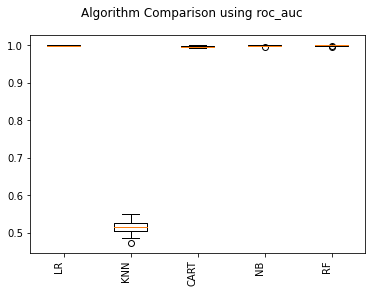

precision
LR: 0.995115 (0.003779)
KNN: 0.223306 (0.061690)
CART: 0.992683 (0.006608)
NB: 0.995115 (0.003779)
RF: 0.995115 (0.003779)


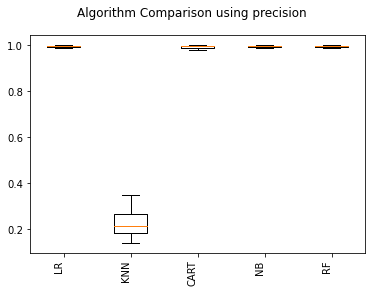

recall
LR: 0.998037 (0.003254)
KNN: 0.065754 (0.017023)
CART: 0.994115 (0.004273)
NB: 0.998037 (0.003254)
RF: 0.998037 (0.003254)


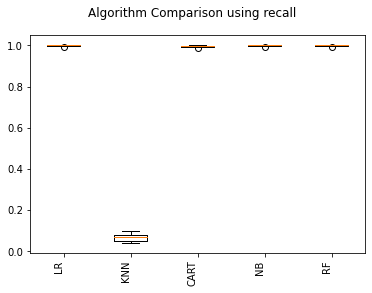

In [82]:
n_splits     = 10
random_state = 123456

compare_models(n_splits, random_state, X_, y)

## Assumptions Check for Logistic Regression

### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary. 

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).

### Assumption 2 -  Only the meaningful variables should be included.

### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.

### Assumption 4 - The independent variables are linearly related to the log odds.

### Assumption 5 -  Logistic regression requires quite a large number of observations.

#### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary. 

In [83]:
new_df["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

### Observations

The target variable is categorical having 0 and 1 binary

#### Assumption 2 -  Only the meaningful variables should be included.

We have ensured that there are no unwanted variables selected for model building.

#### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.

In [84]:
def show_VIF(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    vif_df = pd.DataFrame({'Feature': X.columns, 'VIF': vif})
    vif_df.sort_values(by = ['VIF'], ascending = False, inplace = True)

    return(vif_df)

In [85]:
show_VIF(X_)

,Feature,VIF
0,CreditScore,14.856686
2,NumOfProducts,7.883373
5,Point Earned,7.264874
1,Tenure,3.821250
3,IsActiveMember,2.121988
6,Geography_code,1.808220
4,Complain,1.419901
8,Balance,1.244640
7,Age,1.146078
9,EstimatedSalary,1.000882


### Observations

The following variables are highly colliear as their VIF values exceed the threshold value of 5:
* 1)  CreditScore	(14.057075)
* 2)  NumOfProducts	(7.833422)
* 3)  PointsEarned	(7.243992)

In [86]:
calculate_vif_(X_, thresh = 5)

dropping 'CreditScore' at index: 0
dropping 'NumOfProducts' at index: 1
Remaining variables:
Index(['Tenure', 'IsActiveMember', 'Complain', 'Point Earned',
       'Geography_code', 'Age', 'Balance', 'EstimatedSalary'],
      dtype='object')


,Tenure,IsActiveMember,Complain,Point Earned,Geography_code,Age,Balance,EstimatedSalary
0,2,1,1,464,0,0.416667,-0.761480,0.011739
1,1,1,1,456,2,0.333333,-0.104906,0.125512
2,8,0,1,377,0,0.416667,0.489346,0.139630
3,1,0,0,350,0,0.166667,-0.761480,-0.064717
4,2,1,0,425,2,0.500000,0.221806,-0.214561
...,...,...,...,...,...,...,...,...
9995,5,0,0,300,0,0.166667,-0.761480,-0.039876
9996,10,1,0,771,0,-0.166667,-0.312031,0.015306
9997,7,1,1,564,0,-0.083333,-0.761480,-0.590615
9998,3,0,1,339,1,0.416667,-0.173319,-0.074252


In [87]:
X_collinear = X_.loc[:, ['Tenure', 'IsActiveMember', 'Complain', 'Point Earned','Geography_code', 'Age', 'Balance', 'EstimatedSalary']]

show_VIF(X_collinear)

,Feature,VIF
3,Point Earned,3.870228
0,Tenure,3.092010
1,IsActiveMember,1.937695
4,Geography_code,1.715364
2,Complain,1.380983
5,Age,1.144185
6,Balance,1.112659
7,EstimatedSalary,1.000550


### Observations

The following variables are non-collinear:
1) Point Earned
2) Tenure
3) IsActiveMember
4) Geography_code	
5) Complain
6) Age
7) Balance
8) EstimatedSalary

#### Assumption 4 - The independent variables are linearly related to the log odds.

We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

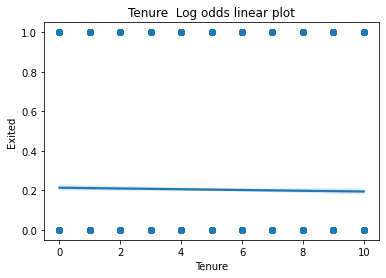

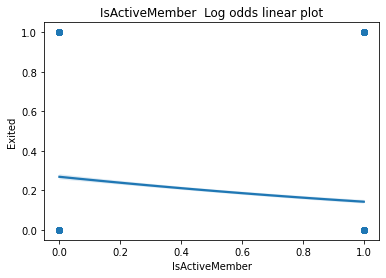

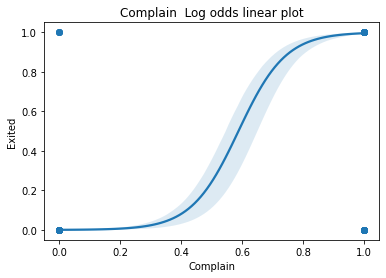

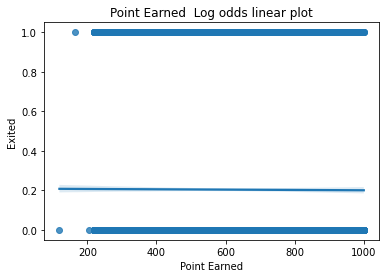

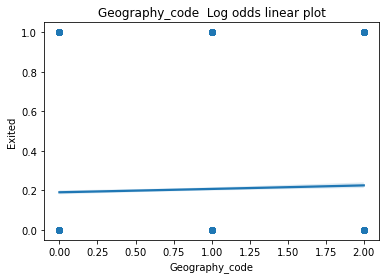

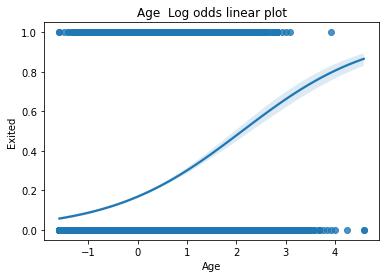

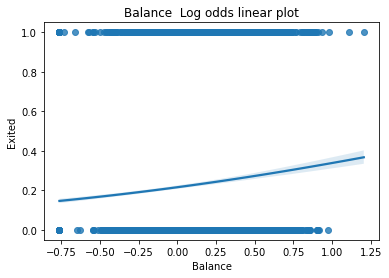

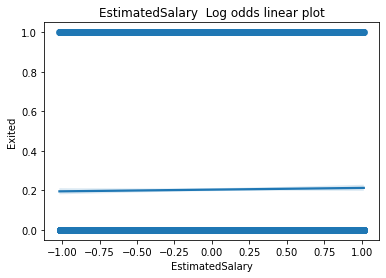

In [88]:
df2           =  new_df
target        =  'Exited'
num_variables =  ['Tenure', 'IsActiveMember', 'Complain', 'Point Earned','Geography_code', 'Age', 'Balance', 'EstimatedSalary']
for i in range(len(num_variables)):
    title = num_variables[i] + '  Log odds linear plot'
    xvar  = num_variables[i]
    check_linearity(xvar,    df2, title, target)

#### Assumption 5 -  Logistic regression requires quite a large number of observations.

In [89]:
#Number of events (cases where Response == 1)
num_events = new_df['Exited'].sum()

# Number of predictor variables (excluding 'Response')
num_predictors = len(X_.columns)

# Number of events per predictor variable
events_per_predictor = num_events / num_predictors

print("Number of events:", num_events)
print("Number of predictor variables:", num_predictors)
print("Events per predictor:", events_per_predictor)

Number of events: 2038
Number of predictor variables: 10
Events per predictor: 203.8


**Explanation:**

We calculate the number of events by summing the 'Exited' column, which represents the cases where the outcome of interest occurs.

We calculate the number of predictor variables by counting the number of columns in the DataFrame and excluding the outcome variable.

We divide the number of events by the number of predictor variables to get the events per predictor.

We can then compare the calculated events per predictor with the recommended guideline of 10-20. If the ratio is below this guideline, it may indicate a potential violation of the assumption of a sufficiently large sample size.

### Observations:

With 2038 events and 10 predictor variables, the calculated number of events per predictor is approximately 203.8. This exceeds the commonly recommended guideline of having at least 10-20 events per predictor variable.

Inference: The dataset appears to meet the assumption of having a sufficiently large sample size for logistic regression.

Having a high number of events per predictor variable suggests that there should be adequate statistical power and precision in estimating the model parameters, enhancing the reliability of the logistic regression analysis. Therefore, the dataset likely provides a robust basis for fitting a logistic regression model and conducting statistical inference.

### Build a base model
We are interested in the measure, recall for minority class for measuring the model performance. 

**Average of Recall & std. deviation in parenthesis for the minority class** of each of the  models used for comparison are listed below:

#### 1) LR: 0.998037 (0.003254)
#### 2) NB: 0.998037 (0.003254)
#### 3) RF: 0.998037 (0.003254)
#### 4) Decision Tree (aka CART): 0.992642 (0.005025)
#### 5) KNN: 0.065754 (0.017023)

Based on the above models comparison. we are choosing **Logistic Regression** as our base model.
Logistic Regression models have high interpretability compared to most classification algorithms due to optimized feature coefficients. Refer: https://www.codecademy.com/learn/machine-learning-logistic-regression/modules/dspath-logistic-regression/cheatsheet


In [90]:
start_time = time.time()

In [91]:
## Split the data into train and test datasets
X_train, X_test, Y_train, Y_test  = train_test_split(X_, y, stratify = y,test_size = 0.30)

In [92]:
vals, counts = np.unique(Y_test, return_counts = True)
print(vals, counts)

[0 1] [2389  611]


In [93]:
print("\nShape: Total observations %d Total features %d" %(X_train.shape[0], X_train.shape[1]))


Shape: Total observations 7000 Total features 10


In [94]:
logit = sm.Logit( Y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.010483
         Iterations 12


#### Report Psuedo R-square, model coefficients and p-value

In [95]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.9793
Time:                        23:01:45   Log-Likelihood:                -73.378
converged:                       True   LL-Null:                       -3539.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.5273      2.247     -2.015      0.044      -8.932      -0.123
CreditScore        -0.0009      0.003     -0.311      0.756      -0.007       0.005
Tenure             -0.1039      

**Observation**

We observe that the McFadden R square (Pseudo R square) is 98.20 % and the model fitness is very good.
This McFadden approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept.

A goodness of fit using McFadden‟s pseudo r square (ρ^2) is used for fitting the overall model. McFadden suggested ρ^2 values of between 0.2 and 0.4 should be taken to represent a very good fit of the model (Louviere et al.,2000).
http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [96]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
print(significant_vars)

['const', 'IsActiveMember', 'Complain', 'Age']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | IsActiveMember | Whether the customer is active or not.| 
| 2 | Complain |Whether the customer has complaint or not. | 
| 3 | Age | Age of the customer | 

### Get Odds ratio

In [97]:
significant_vars

['const', 'IsActiveMember', 'Complain', 'Age']

In [98]:
ODDs_Ratio_df =  pd.DataFrame({'Important Variable' : lg.params.index, 'Log-odds' : lg.params.values })

In [99]:
ODDs_Ratio_df   =  ODDs_Ratio_df.loc[ODDs_Ratio_df['Important Variable'].isin(significant_vars), :]

In [100]:
ODDs_Ratio_df.drop(0, inplace = True)

In [101]:
ODDs_Ratio_df['Odds Ratio'] =  np.exp(ODDs_Ratio_df['Log-odds'])
ODDs_Ratio_df.sort_values(by=['Odds Ratio'], ascending=False, inplace = True)

In [102]:
ODDs_Ratio_df

,Important Variable,Log-odds,Odds Ratio
5,Complain,13.248647,567301.780193
8,Age,1.111871,3.040042
4,IsActiveMember,-1.540322,0.214312


### Odds Ratio Interpretation for significant variables

Holding other things constant:

| Slno | Inference |
| ----- | ------------------------------------- |
| 1 | The odds of customer churn are 567627 times the odds of customer retention when the customer has complaints.|
| 2 | The odds of customer churn are approximately 2.78 times the odds of customer retention for one unit increase in Age.|


Training Data
[[5563   10]
 [   3 1424]]


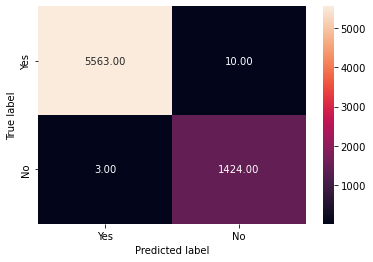

Training Accuracy: 99.814%

Testing Data
[[2389    0]
 [   1  610]]


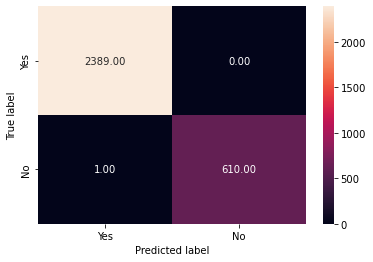

Test Accuracy: 99.967%

Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5573
           1       0.99      1.00      1.00      1427

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


Testing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Training data


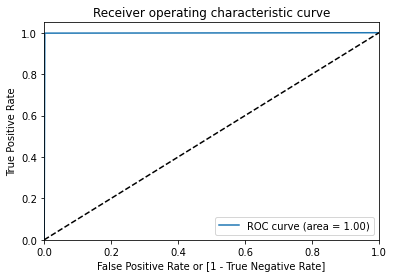


Testing data


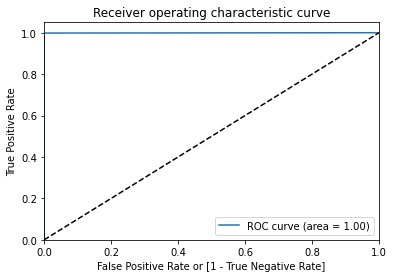


With K fold cross validation

Scoring:  accuracy
[0.99571429 0.99714286 1.         0.99857143 0.99714286 1.
 0.99857143 0.99857143 0.99857143 0.99714286]

Accuracy: 0.998 (0.001)

Scoring:  precision
[0.98701299 0.98518519 1.         1.         0.98601399 1.
 1.         0.99354839 0.99285714 0.98473282]

Precision: 0.993 (0.006)

Scoring:  recall
[0.99346405 1.         1.         0.99350649 1.         1.
 0.99342105 1.         1.         1.        ]

Recall: 0.998 (0.003)

Scoring:  roc_auc
[0.99854226 0.99909827 1.         0.99947671 0.99964476 1.
 0.9975389  0.99988107 0.99932033 0.99858809]

AUROC: 0.999 (0.001)
None


In [103]:
n_splits, random_state = 10, 12345
                     
print(logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ))

### To get the elapsed time, get the end time of processing

In [104]:
logit_elapsed_time_secs = time.time() - start_time

logit_elapsed_time_msg = "LR model - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(logit_elapsed_time_secs))

print(logit_elapsed_time_msg)   

LR model - Execution took: 0:00:03 secs (Wall clock time)


## END